In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
import tensorflow as tf

In [51]:
x_data = np.linspace(0.0, 10.0,1000000)

In [52]:
noise = np.random.randn(len(x_data))

In [53]:
noise

array([-1.41699317,  0.16044116, -1.33051046, ..., -0.09230151,
       -0.37823461, -1.9603876 ])

y = mx + b

b = 5

In [54]:
y_true = (0.5 * x_data) + 5 + noise

In [55]:
x_df = pd.DataFrame(data=x_data, columns=['x Data'])

In [56]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [57]:
y_df.head()

,Y
0,3.583007
1,5.160446
2,3.669500
3,5.528490
4,5.187730


In [58]:
my_data = pd.concat([x_df, y_df],axis=1)

In [59]:
my_data.head()

,x Data,Y
0,0.00000,3.583007
1,0.00001,5.160446
2,0.00002,3.669500
3,0.00003,5.528490
4,0.00004,5.187730


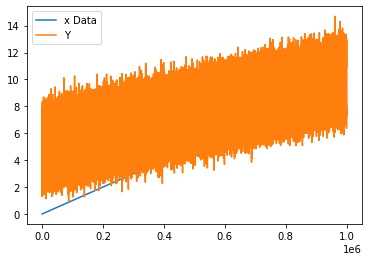

In [60]:
my_data.plot()

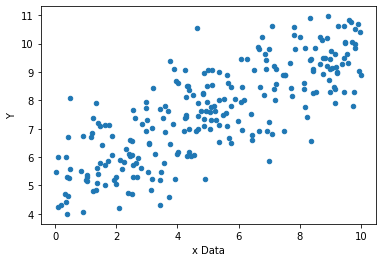

In [65]:
my_data.sample(n=250).plot(kind='scatter', x='x Data', y='Y')

In [66]:
batch_size = 8

In [70]:
np.random.randn(2)

array([0.18876342, 0.71292326])

In [68]:
m = tf.Variable(0.18)
b = tf.Variable(0.71)

In [71]:
xph = tf.placeholder(tf.float32,[batch_size])

In [72]:
yph = tf.placeholder(tf.float32,[batch_size])

In [73]:
y_model = m*xph + b

In [74]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [75]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [76]:
init = tf.global_variables_initializer()

In [77]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [78]:
model_m

0.57194394

In [79]:
model_b

4.8873196

In [82]:
y_hat = x_data*model_m + model_b

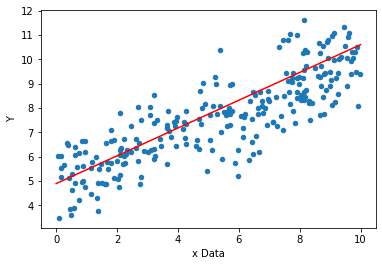

In [83]:
my_data.sample(250).plot(kind='scatter',x='x Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [84]:
# Array basics

mat = np.arange(0,100).reshape(10,10)

In [85]:
mat

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [87]:
mat[4,3]

43

In [88]:
mat[:,0]

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [89]:
mat[5,:]

array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59])

In [90]:
mat

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [91]:
mat[0:3,0:3]

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22]])

In [92]:
# masking
mat > 50

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

In [94]:
mat[mat>50]

array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
%matplotlib inline  
#outside jupyter plt.show()

In [101]:
x = np.arange(0,10)

In [102]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
y = x **2

In [104]:
y

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)

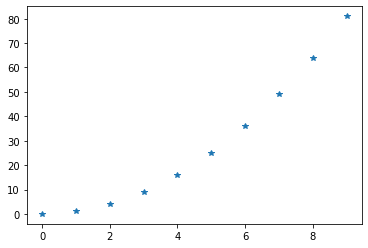

In [106]:
plt.plot(x,y,"*")

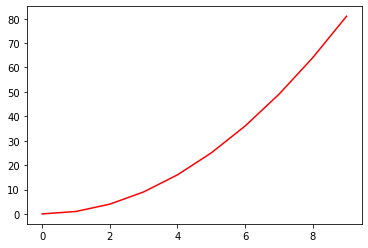

In [107]:
plt.plot(x,y,"red")

Text(0, 0.5, 'Y LABEL')

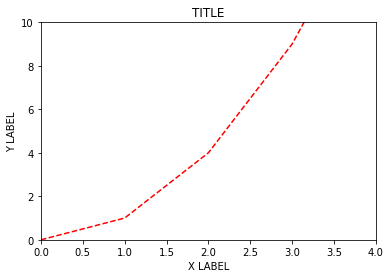

In [113]:
plt.plot(x,y,"r--")
plt.xlim(0,4)
plt.ylim(0,10)
plt.title("TITLE")
plt.xlabel('X LABEL')
plt.ylabel('Y LABEL')

In [114]:
mat = np.arange(0,100).reshape(10,10)

In [115]:
mat

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

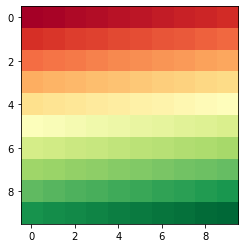

In [118]:
plt.imshow(mat,cmap='RdYlGn')

In [121]:
mat = np.random.randint(0,1000,(10,10))

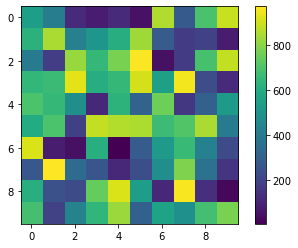

In [122]:
plt.imshow(mat)
plt.colorbar()